Write a python script to implement Eulers' method, second-order and fourth-order Runge Kutta to solve the following ODE:
$$
\frac{dx}{dt} = -x^3 + \sin(t)
$$

Compare the results.
For a choice of initial time $t_0=0$, final time $t_{\rm fin}=100$, initial position $x_0=0$ and step size $h=0.4$

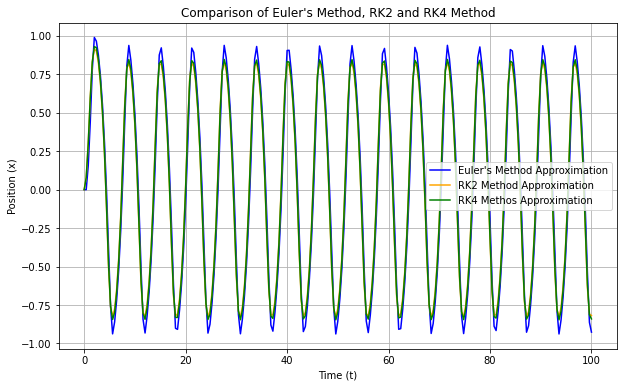

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t0 = 0
tfin = 100
h = 0.4
N = int((tfin - t0) / h)

# Time values and initial condition for Euler's method
t_values = np.linspace(t0, tfin, N+1)
x_values = np.zeros(len(t_values))
x_values[0] = 0  # Initial condition

# Function defining the ODE
def f(x, t):
    return -x**3 + np.sin(t)

# Euler's Method
for n in range(0, N):
    t = t_values[n]
    x = x_values[n]
    x_values[n + 1] = x + h * f(x, t)

# Initialize for RK2 Method
x_values_rk2 = np.zeros(len(t_values))
x_values_rk2[0] = 0  # Initial condition for RK2

# Runge-Kutta 2nd Order Method
for i in range(0, N):
    t = t_values[i]
    x = x_values_rk2[i]
    
    k1 = h/2 * f(x, t)
    k2 = h * f(x + k1, t + h/2)  

    x_values_rk2[i + 1] = x + k2  

# Initialize for RK4 method
x_values_rk4=np.zeros(len(t_values))
x_values_rk4[0]=0


# Runge-Kutta 4-th Order Method

for i in range(0,N):
    t = t_values[i]
    x = x_values_rk4[i]

    k1 = h/2 * f(x, t)
    k2 = h/2 * f(x+k1, t+h/2)  
    k3 = h * f(x+k2, t+h/2)
    k4 = h * f(x+k3, t+h)

    x_values_rk4[i+1]=x + 1/6 *(2*k1+4*k2+2*k3+k4)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="Euler's Method Approximation", color='blue')
plt.plot(t_values, x_values_rk2, label="RK2 Method Approximation", color='orange')
plt.plot(t_values, x_values_rk4, label="RK4 Methos Approximation", color="green")
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.grid()
plt.legend()
plt.title("Comparison of Euler's Method, RK2 and RK4 Method")
plt.show()

### Solve this ODE:
$$
y'+\frac{y}{\sqrt{x^2+1}} = \frac{1}{x+\sqrt{x^2+1}}
$$
### with initial conditions: $x_0=0, y_0=0$

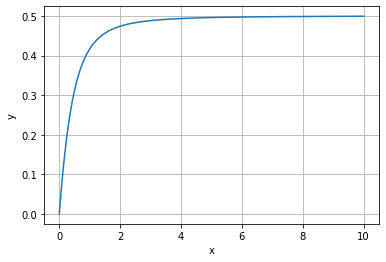

In [2]:
x0 = 0
xfin = 10
h = 0.01
N = int((xfin - x0) / h)

def f(y, x):
    return 1/(x + np.sqrt(x**2 + 1)) - (y/np.sqrt(x**2 + 1))

y_values = np.zeros(N + 1)  
x_values = np.linspace(x0, xfin, N + 1)

y_values[0] = 0  

#Euler's scheme
for n in range(0, N):
    y = y_values[n]
    x = x_values[n]
    y_values[n + 1] = y + h * f(y, x)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Write a Python script to implement Euler’s method to evolve a system of two points in two dimensions ($xy$ plane), subject to gravity forces, with the following initial conditions. Initial positions of particles 1 and 2 (in the plane xy): $x = (1.0,−1.0), y = (1.0,−1.0)$. Initial velocities of particles 1 and 2 (in the plane xy): $vx = (−0.5, 0.5), vy = (0.0, 0.0)$. Let us assume that the masses $m_1,m_2=1$, and the gravity constant in our units is $G = 1$. Let us assume $t0 = 0$, $tfin = 300$ and $h = 0.01$

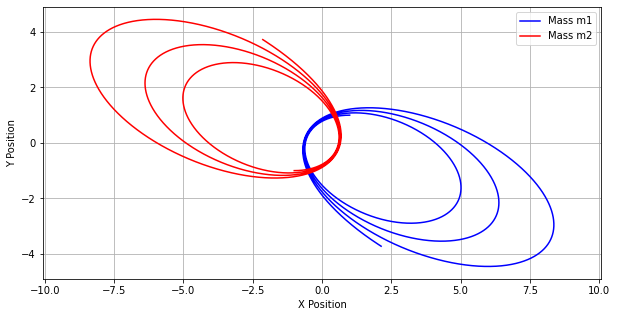

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Specification dictionary
specs = {
    'x0': [1., 1, -1., -1, -0.5, 0.0, 0.5, 0.0], # positions and velocities at the start
    't0': 0.,
    't1': 300.,
    'h': 0.01
}

def euler_2body(specs):
    
    def acceleration(x):
        m1 = 1
        m2 = 1
        x1 = x[0]
        y1 = x[1]
        x2 = x[2]
        y2 = x[3]
        r = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        ax1 = m2 * (x2 - x1) / (r ** 3)  # ax1 = dvx1/dt
        ay1 = m2 * (y2 - y1) / (r ** 3)  # ay1 = dvy1/dt
        ax2 = m1 * (x1 - x2) / (r ** 3)  # ax2 = dvx2/dt
        ay2 = m1 * (y1 - y2) / (r ** 3)  # ay2 = dvy2/dt
        return np.array([ax1, ay1, ax2, ay2])

    x0 = specs['x0']
    h = specs['h']
    t0 = specs['t0']
    t1 = specs['t1']

    # Initial positions and velocities
    x = np.array(x0[:4])  # Positions (x1, y1, x2, y2)
    v = np.array(x0[4:])  # Velocities (vx1, vy1, vx2, vy2)

    times = [t0]
    y = np.copy(x0)  # Initialize the trajectory data
    t = t0

    while t < t1:
        a = acceleration(x)  # Current acceleration

        # Update positions and velocities using Euler's method
        x += v * h  # Update positions
        v += a * h  # Update velocities

        # Advance time
        t += h

        # Store the new state
        ynext = np.array([x[0], x[1], x[2], x[3], v[0], v[1], v[2], v[3]])
        y = np.vstack((y, ynext))
        times.append(t)

    return times, y

# Execute the Euler method
t, xt = euler_2body(specs)

plt.figure(figsize=(10, 5))
plt.plot(xt[:, 0], xt[:, 1], label='Mass m1', color='blue')
plt.plot(xt[:, 2], xt[:, 3], label='Mass m2', color='red')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

### Write a new script to implement the Midpoint method to evolve a system of two points in two dimensions (xy plane) described in the previous exercise. Let us assume $t0 = 0$, $t_{fin} = 300$ and $h = 0.01$. 

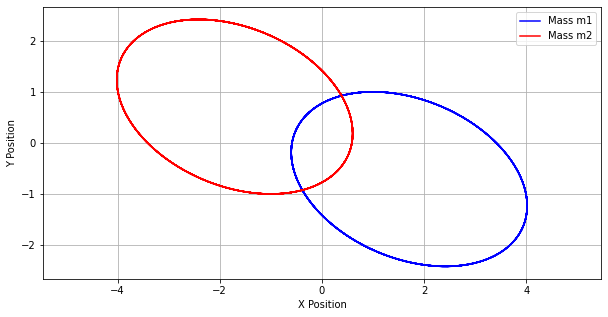

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Specification dictionary
specs = {
    'x0': [1., 1, -1., -1, -0.5, 0.0, 0.5, 0.0], #positions and velocities at start
    't0': 0.,
    't1': 300.,
    'h': 0.01
}

def midpoint_2body(specs):
    
    def acceleration(x):
        m1 = 1.
        m2 = 1.
        x1 = x[0]
        y1 = x[1]
        x2 = x[2]
        y2 = x[3]
        r = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        ax1 = m2 * (x2 - x1) / (r ** 3)  # ax1 = dvx1/dt
        ay1 = m2 * (y2 - y1) / (r ** 3)  # ay1 = dvy1/dt
        ax2 = m1 * (x1 - x2) / (r ** 3)  # ax2 = dvx2/dt
        ay2 = m1 * (y1 - y2) / (r ** 3)  # ay2 = dvy2/dt
        return np.array([ax1, ay1, ax2, ay2])

    x0 = specs['x0']
    h = specs['h']
    t0 = specs['t0']
    t1 = specs['t1']

    # Initial positions and velocities
    x = np.array(x0[:4])  #  Positions (x1, y1, x2, y2)
    v = np.array(x0[4:])  # Velocities (vx1, vy1, vx2, vy2)

    times = [t0]
    y = np.copy(x0)  # Initialize the trajectory data
    t = t0

    while t < t1:
        a = acceleration(x)  # Current acceleration

        # Calculate k1
        k1x = 0.5 * h * v
        k1v = 0.5 * h * a

        # Update positions to the midpoint
        x1 = x + k1x

        # Calculate acceleration at the midpoint
        a1 = acceleration(x1)

        # Calculate k2
        k2x = h * (v + k1v)
        k2v = h * a1

        # Update positions and velocities
        x += k2x
        v += k2v

        # Advance time
        t += h

        # Store the new state
        ynext = np.array([x[0], x[1], x[2], x[3], v[0], v[1], v[2], v[3]])
        y = np.vstack((y, ynext))
        times.append(t)

    return times, y

# Execute the midpoint method
t, xt = midpoint_2body(specs)

plt.figure(figsize=(10, 5))
plt.plot(xt[:, 0], xt[:, 1], label='Mass m1', color='blue')
plt.plot(xt[:, 2], xt[:, 3], label='Mass m2', color='red')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()